## Breast cancer prediction - Model evaluation and fine tuning
1. Load the features selected by correlation
2. Split the dataset into train and test datasets
3. Model building and selecting the model with highest evaluation metric
4. Hyperparameter tuning
5. Save the finalized model

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
import scipy.signal
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

import joblib

In [2]:
#Load the dataset from sklearn
from sklearn.datasets import load_breast_cancer

In [3]:
cancer=load_breast_cancer()

In [4]:
#Read training datasets
df=pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [6]:
df['target'] = cancer.target

In [7]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
print(df.nunique())

In [8]:
len(X.columns)

NameError: name 'X' is not defined

In [9]:
# define training dataset
#Best features selected based on correlation between target variables and collinearity between the variables
#where thereshold values used is 0.6

X=df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']]
y=df[['target']]


array([[<AxesSubplot:title={'center':'mean radius'}>,
        <AxesSubplot:title={'center':'mean texture'}>,
        <AxesSubplot:title={'center':'mean perimeter'}>,
        <AxesSubplot:title={'center':'mean area'}>,
        <AxesSubplot:title={'center':'mean smoothness'}>,
        <AxesSubplot:title={'center':'mean compactness'}>],
       [<AxesSubplot:title={'center':'mean concavity'}>,
        <AxesSubplot:title={'center':'mean concave points'}>,
        <AxesSubplot:title={'center':'mean symmetry'}>,
        <AxesSubplot:title={'center':'mean fractal dimension'}>,
        <AxesSubplot:title={'center':'radius error'}>,
        <AxesSubplot:title={'center':'texture error'}>],
       [<AxesSubplot:title={'center':'perimeter error'}>,
        <AxesSubplot:title={'center':'area error'}>,
        <AxesSubplot:title={'center':'smoothness error'}>,
        <AxesSubplot:title={'center':'compactness error'}>,
        <AxesSubplot:title={'center':'concavity error'}>,
        <AxesSubplot:tit

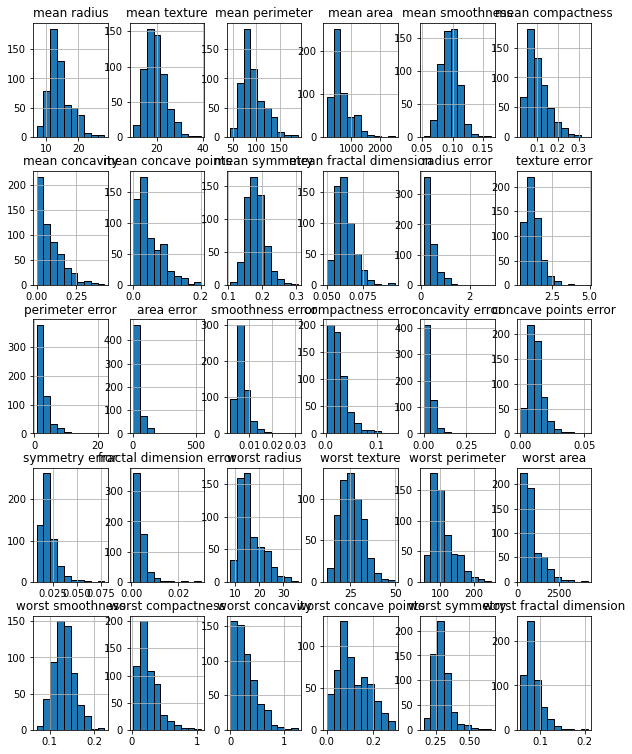

In [10]:
##Plot histograms of variables
#define format for subplots
fig, axis = plt.subplots(5, 6, figsize=(10,13))

#create histogram for each column in DataFrame
X.hist(ax=axis, edgecolor='black', grid=True)

### Scaling the features using pipeline
1. If the datset follows normal distribution, use Standardization. 
   StandardScaler rescales dataset to have a mean of 0 and a standard deviation of 1.

2. The given dataset does not follow a normal distribution.
   Normalize or use MinMax scaler on the dataset so that each value falls between 0 and 1. 
 

In [11]:
# This dataset follows a **normal** distribution
num_features = X.select_dtypes(exclude="object").columns

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(569, 30)

### Feature selection algorithm: Least absolute shrinkage and selection operator

In [ ]:
#Correlation with respect to target variable
correlation_matrix =df.corr()

In [ ]:
plt.figure(figsize=(25,10))
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#Correlation of all the variables with the target variable
df_corr = df.corr()['target'].abs().sort_values(ascending=False)
df_corr

In [ ]:
# get all the features that has at least 0.6 in correlation to the 
# target
features = df_corr[df_corr > 0.7].index.to_list()[1:]
features

### Split training and testing dataset

In [49]:
X=df[['mean texture', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean symmetry', 'mean fractal dimension', 'radius error',
       'texture error', 'perimeter error', 'area error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst texture',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst symmetry', 'worst fractal dimension']]
y=df[['target']]

In [50]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=52)

In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 22) (398, 1)
(171, 22) (171, 1)


In [52]:
# summarize the dataset
y_train=np.ravel(y_train)
y=np.ravel(y)
print(X_train.shape, y_train.shape)

(398, 22) (398,)


In [53]:
print(X_train.shape, y_train.shape)

(398, 22) (398,)


### Model evaluation

In [54]:
def evaluate_model(true, predicted):
    accuracy=accuracy_score(true, predicted)
    #f1_score=f1_score(true, predicted)
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return accuracy, mae, rmse, r2_square

In [56]:
models = {
    "Logistic Regression":LogisticRegression(solver='lbfgs', max_iter=1000),
    "Linear Discriminant Analysis" :LinearDiscriminantAnalysis(),
    #"K-Neighbors Classifer": KNeighborsClassifier(n_neighbors=2),
    "Support_vector Machine": svm.SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifer":  RandomForestClassifier(), 
    
}
model_list = []
r2_list =[]
accruracy_list=[]
rmse_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_accuracy,model_test_mae ,model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    hyperparameters = model.get_params()
    print("Hyperparameters:", hyperparameters)
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    #print("- F1_Score: {:.4f}".format(model_train_f1))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    #print("- F1_Score: {:.4f}".format(model_train_f1))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    accruracy_list.append(model_test_accuracy)
    rmse_list.append(model_test_rmse)
    
    print('='*35)
    print('\n')

Logistic Regression
Hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Model performance for Training set
- Accuracy: 0.9447
- Root Mean Squared Error: 0.2351
- Mean Absolute Error: 0.0553
- R2 Score: 0.7634
----------------------------------
Model performance for Test set
- Accuracy: 0.9649
- Root Mean Squared Error: 0.1873
- Mean Absolute Error: 0.0351
- R2 Score: 0.8502


Linear Discriminant Analysis
Hyperparameters: {'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}
Model performance for Training set
- Accuracy: 0.9598
- Root Mean Squared Error: 0.2005
- Mean Absolute Error: 0.0402
- R2 Score: 0.8279
----------------------------------
Model perform

In [57]:
pd.DataFrame(list(zip(model_list, accruracy_list,r2_list,rmse_list)), columns=['Model Name', 'Accuracy','R2_Score','RMSE']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy,R2_Score,RMSE
0,Logistic Regression,0.964912,0.850175,0.187317
1,Linear Discriminant Analysis,0.964912,0.850175,0.187317
4,Random Forest Classifer,0.947368,0.775263,0.229416
3,Decision Tree,0.912281,0.625438,0.296174
2,Support_vector Machine,0.888889,0.525555,0.333333


In [ ]:
#Cross validation
k = 10  # You can adjust this value based on your needs

# Create a KFold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and specify the scoring metric (e.g., accuracy)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

###  Select the best model 
1. Train the selected model and get metric values
2. If the metric values are as per expectation, get hyperparameters.
3. Save the trained model

In [25]:
model=RandomForestClassifier(bootstrap= True, ccp_alpha= 0.0, class_weight= None, 
                             criterion= 'gini', max_depth= None, max_features='sqrt',
                             max_leaf_nodes= None, max_samples= None, min_impurity_decrease= 0.0,
                             min_samples_leaf= 1, min_samples_split= 2, min_weight_fraction_leaf= 0.0,
                             n_estimators= 100, n_jobs= None, oob_score= False, random_state= None,
                             verbose= 0, warm_start= False)

In [26]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [27]:
y_pred=model.predict(X_test)

In [32]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy :',accuracy)
f1score=f1_score(y_test,y_pred)
print('F1_score :',f1score)
mse=mean_squared_error(y_test,y_pred)
print('Mean_squared_error :',mse)

Accuracy : 0.9824561403508771
F1_score : 0.986046511627907
Mean_squared_error : 0.017543859649122806


In [33]:
matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Text(33.0, 0.5, 'True')

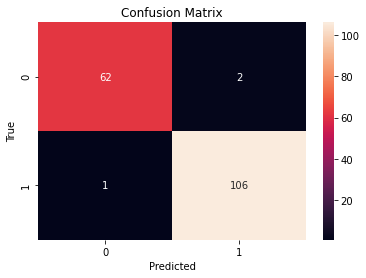

In [34]:
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [37]:
#Cross validation
k = 11  # You can adjust this value based on your needs

# Create a KFold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and specify the scoring metric (e.g., accuracy)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation scores: [0.98076923 0.98076923 0.94230769 0.98076923 0.96153846 0.90384615
 0.96153846 0.94230769 0.96078431 0.96078431 0.90196078]
Mean CV accuracy: 0.9524886877828055


In [38]:
# Get hyperparameter values
hyperparameters = model.get_params()
print("Hyperparameters:", hyperparameters)

Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Download the model

In [39]:
# Save the trained model to a file
joblib.dump(model, 'trained_model.joblib')

['trained_model.joblib']

In [ ]:
# Save hyperparameters to a file (can use a dictionary)
hyperparameters = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
joblib.dump(hyperparameters, 'hyperparameters.joblib')

In [ ]:
# Load the trained model
loaded_model = joblib.load('trained_model.joblib')

In [ ]:
# Load hyperparameters
loaded_hyperparameters = joblib.load('hyperparameters.joblib')

### Validate the saved model 
1. Use the saved model to predict the values on test data or validation data of different sizes

In [ ]:
predictions=loaded_model.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,predictions)
print('Accuracy :',accuracy)
f1score=f1_score(y_test,predictions)
print('F1_score :',f1score)
mse=mean_squared_error(y_test,predictions)
print('Mean_squared_error :',mse)